<a href="https://colab.research.google.com/github/chulgit/hello-world/blob/master/RL_toy_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

code from: https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

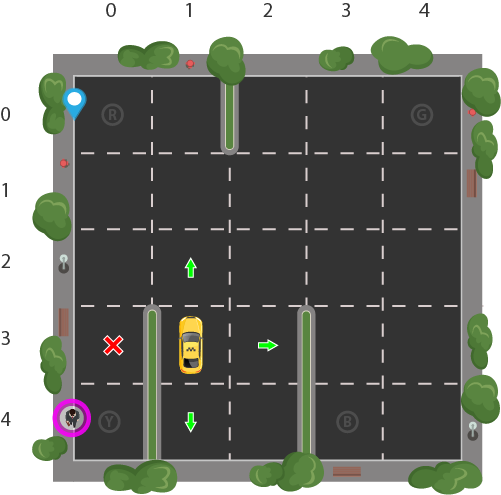

Goals
* Drop off the passenger to the right location.
* Save passenger's time by taking minimum time possible to drop off

Rewards
* Successful drop off -> high positive rewards
* Fail to drop off at correct location -> high negative rewards
* Drop off too slow -> slight negative rewards

State Space: Set of all possible situitions taxi could inhibit
* 5 x 5 location
* (4+1) passenger location
* 4 destination

Action Space: Set of all possible actions
* South = 0
* North = 1
* East = 2
* West = 3
* Pick up = 4
* Drop off = 5

In [ ]:
# pip install cmake 'gym[atari]' scipy

In [ ]:
import gym
env = gym.make("Taxi-v3").env

In [ ]:
env.reset() # reset environment to a new, random state
env.render()
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [ ]:
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)
env.s = state

State: 328


In [ ]:
env.step(0) # next_state, reward, done, info = env.step(action) 

(428, -1, False, {'prob': 1.0})

In [ ]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

Q-learning Algorithm
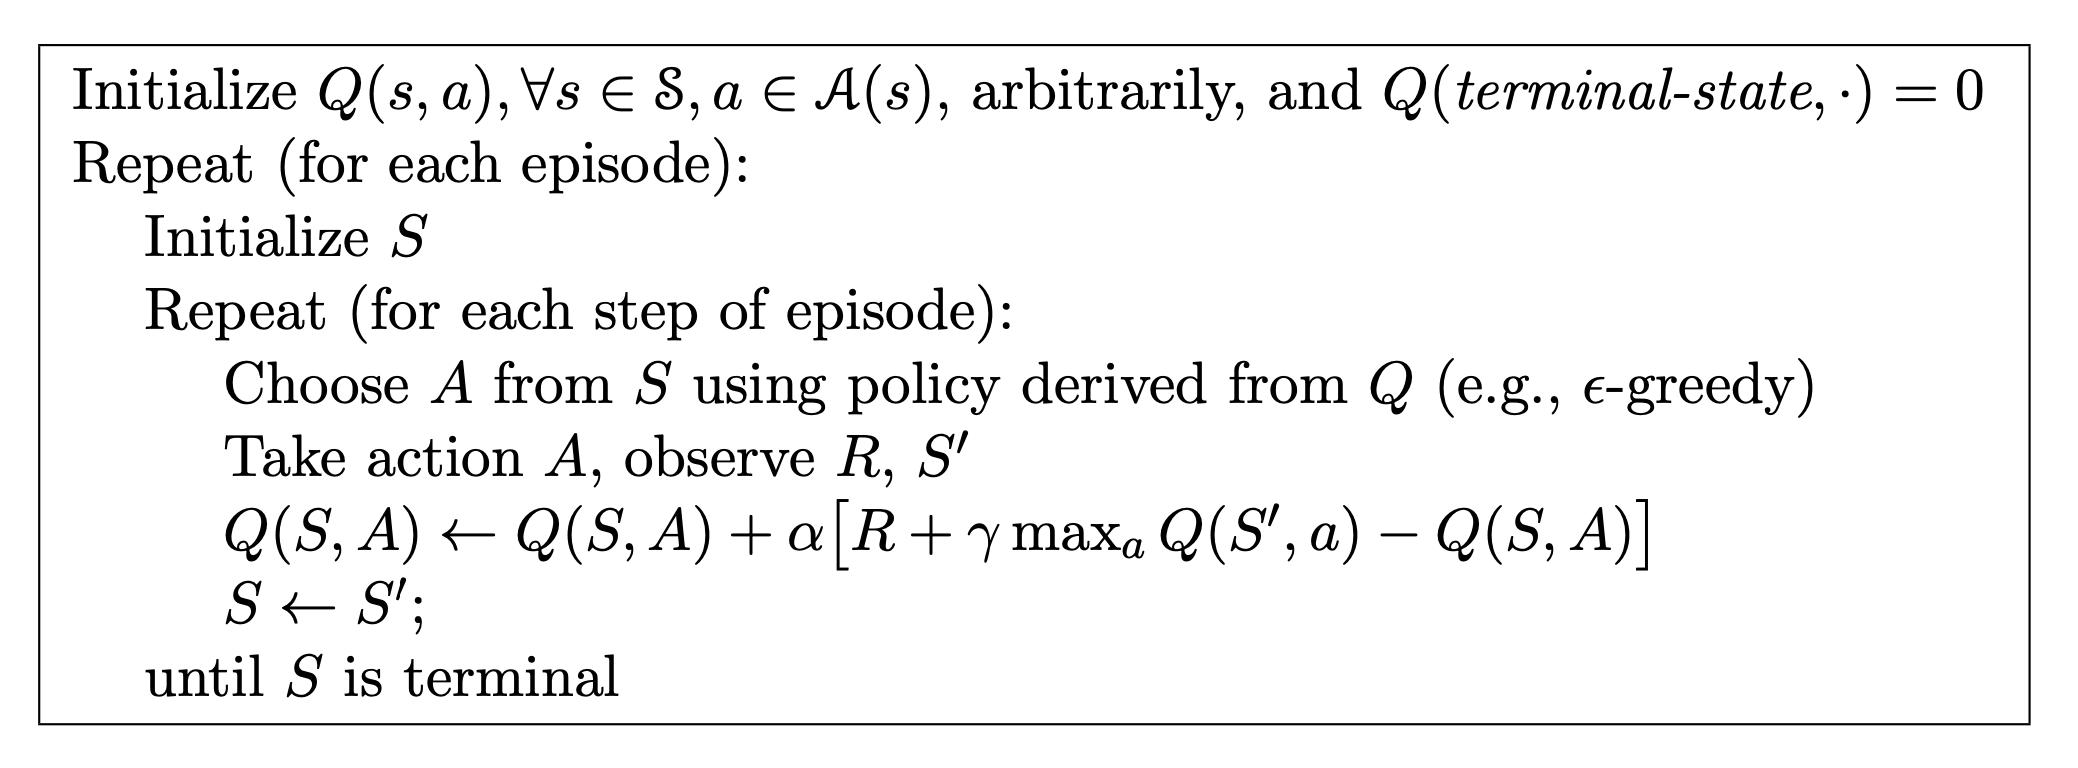

In [ ]:
import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.



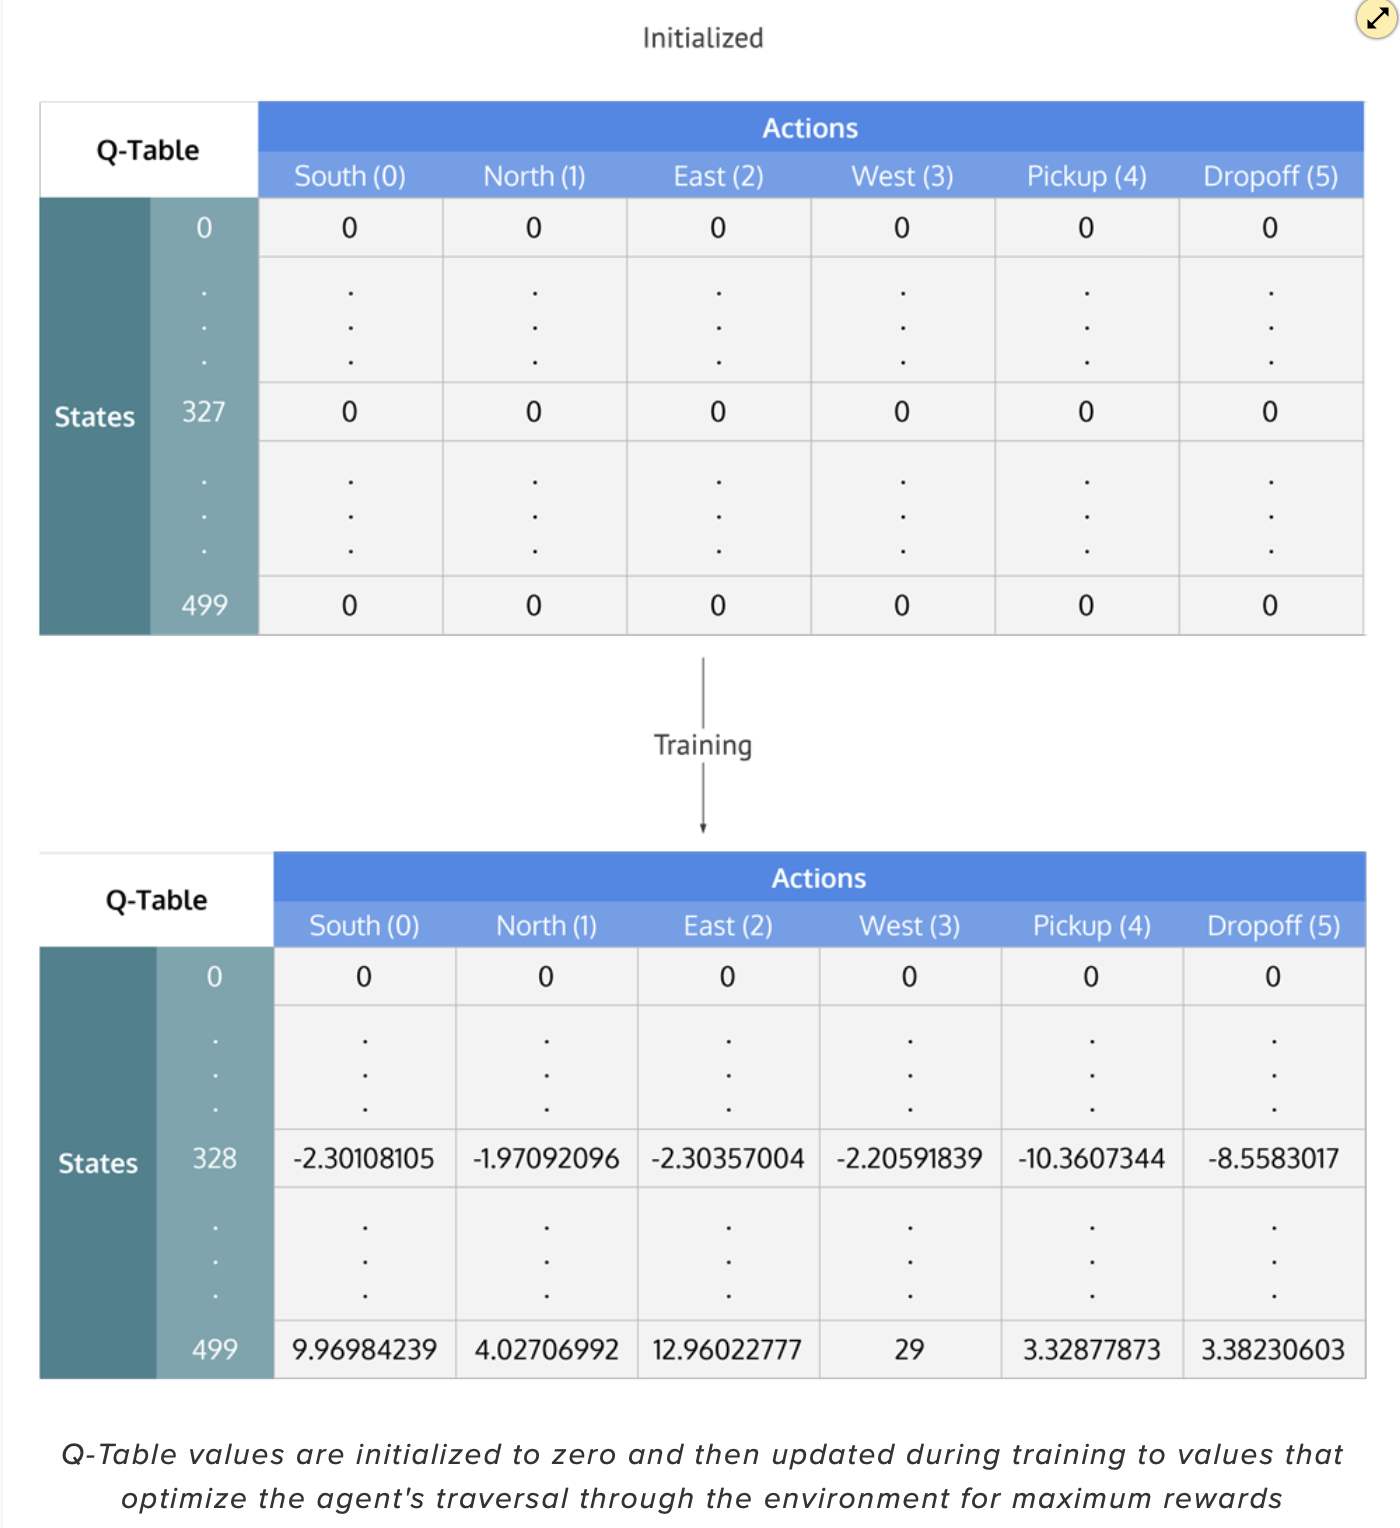

In [ ]:
total_epochs, total_penalties = 0, 0
episodes = 100
frames = []

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1
        
        frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 13.53
Average penalties per episode: 0.0


In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 1353
State: 0
Action: 5
Reward: 20
